In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import collections
import ipynb.fs.full.Structural_Perturbations as SP
import ipynb.fs.full.MultiTest as MT
tf.logging.set_verbosity(tf.logging.ERROR)
import sys

/home/uttaran/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Data has apparently already been downloaded and unpacked.


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


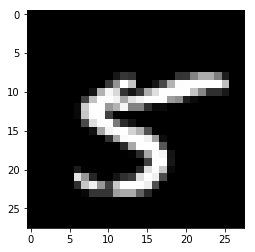

In [21]:
train_data,train_labels,eval_data,eval_labels = SP.load(data='mnist')
SP.Display(eval_data,433)

In [16]:
eval_data = SP.Scaling(eval_data,.8)

In [18]:
eval_data = Exposure(eval_data,+60)

In [46]:
eval_data = Rotation(eval_data,10)

In [69]:
eval_data = Translation(eval_data,2)

In [22]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=1,
        kernel_size=[3, 3],
        padding="same",
        activation=tf.nn.relu)

    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    pool1_flat = tf.reshape(pool1, [-1, 14 * 14 * 1])

    dense = tf.layers.dense(inputs=pool1_flat, units=5, activation=tf.nn.relu)

    # Add dropout operation; 0.6 probability that element will be kept
#     dropout = tf.layers.dropout(
#         inputs=pool1_flat, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    logits = tf.layers.dense(inputs=dense, units=10)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)

        #"classes": temp,
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(
            mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy":
        tf.metrics.accuracy(labels=labels, predictions=predictions["classes"]),
    }
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [23]:
# Evaluate the model and print results
mnist_classifier = tf.estimator.Estimator(
  model_fn=cnn_model_fn, model_dir="./models/mnist_less")

# Set up logging for predictions
# Log the values in the "Softmax" tensor with label "probabilities"
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(
  tensors=tensors_to_log, every_n_iter=50)

In [24]:
print("started\n")
# Train the model
while 1:

# Train the model
    print("Training")
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=256,
      num_epochs=None,
      shuffle=True)

    mnist_classifier.train(
      input_fn=train_input_fn,
      steps=1000,
      hooks=[logging_hook])
    SP.Test(train_data, train_labels, eval_data, eval_labels,
                           mnist_classifier)
#     print(curr_result)
#     if curr_result[0] - curr_result[1] > 0.10 or curr_result[1] > 0.98:
#        break
    #print(curr_result)
    
print ("Finished")

started

Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.75685453, 'loss': 0.8204565, 'global_step': 1000}
######### Test accuracy #############
 {'accuracy': 0.7666, 'loss': 0.82491523, 'global_step': 1000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.7954364, 'loss': 0.6726853, 'global_step': 2000}
######### Test accuracy #############
 {'accuracy': 0.7999, 'loss': 0.6728094, 'global_step': 2000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.8088545, 'loss': 0.61379665, 'global_step': 3000}
######### Test accuracy #############
 {'accuracy': 0.815, 'loss': 0.6125842, 'global_step': 3000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.8190727, 'loss': 0.5821022, 'global_step': 4000}
######### Test accuracy #############
 {'accuracy': 0.8202, 'loss': 0.5850295, 'global_step': 4000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.8262, 'loss': 0.55934614, 'global_step': 5000}
######### Test accuracy #############
 {'

%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.87618184, 'loss': 0.42338407, 'global_step': 40000}
######### Test accuracy #############
 {'accuracy': 0.8753, 'loss': 0.43110555, 'global_step': 40000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.87625456, 'loss': 0.4210485, 'global_step': 41000}
######### Test accuracy #############
 {'accuracy': 0.8745, 'loss': 0.42914107, 'global_step': 41000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.8742727, 'loss': 0.42394018, 'global_step': 42000}
######### Test accuracy #############
 {'accuracy': 0.8724, 'loss': 0.4347214, 'global_step': 42000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.87592727, 'loss': 0.4246972, 'global_step': 43000}
######### Test accuracy #############
 {'accuracy': 0.8724, 'loss': 0.43571618, 'global_step': 43000}
Training
%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.8758909, 'loss': 0.42236567, 'global_step': 44000}
######### Test accuracy #############
 {'

KeyboardInterrupt: 

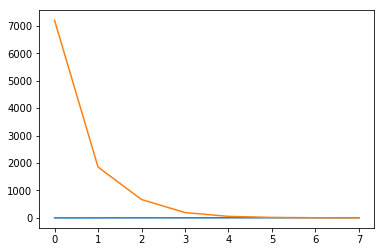

In [9]:
Plot(eval_data,eval_labels,mnist_classifier)

In [12]:
data = np.copy(SP.Rotation(eval_data,30))

In [25]:
a, b, c, d, e, f = SP.Test(train_data, train_labels, data, eval_labels,
                           mnist_classifier, 1)

%%%%%%% Train accuracy %%%%%%%%%%%%
 {'accuracy': 0.87634546, 'loss': 0.420327, 'global_step': 45001}
######### Test accuracy #############
 {'accuracy': 0.4934, 'loss': 2.0943131, 'global_step': 45001}


In [14]:
graph = []

In [27]:
graph.append(["Samples = " , samples])
graph.append(['Training set = ', database.shape[0]])
graph.append(["Test Data = ", eval_data.shape[0]])
graph.append(["Training Accuracy : ",a[1]])
graph.append(["Test Accuracy : ",d[1]])

In [28]:
for i in graph:
    print(i)

['Samples = ', 15]
['Training set = ', 1920]
['Test Data = ', 299]
['Training Accuracy : ', 0.95]
['Test Accuracy : ', 0.33110368]


In [ ]:
name = tf.estimator.Estimator.get_variable_names(mnist_classifier)
a = []
for i in name:
    a.append(tf.estimator.Estimator.get_variable_value(name=i,self=mnist_classifier))

In [ ]:
for i in a:
    print(i.shape)

In [167]:
%%capture
a = []
t = [0,15,30,45,60,90,135,180,225,275]
for i in t:
    g = np.copy(eval_data)
    eval_data_temp = SP.Rotation(g,i)
    a.append(SP.Test(train_data,train_labels,eval_data_temp,eval_labels,mnist_classifier,1)[3])

In [168]:
a = np.array(a)
a = a.T

In [182]:
b = []
for i in range(0,a.shape[1]):
    b.append((t[i],a[1][i]))
print(b)

[(0, '0.7067308'), (15, '0.63461536'), (30, '0.44230768'), (45, '0.22836539'), (60, '0.16346154'), (90, '0.125'), (135, '0.17548077'), (180, '0.31490386'), (225, '0.16586539'), (275, '0.14903846')]


In [46]:
train_data,train_labels,eval_data,eval_labels = SP.load(data='mnist')
eval_data = SP.Scaling(eval_data,0.7)
eval_data = SP.Rotation(eval_data,30)
eval_data = SP.Translation(eval_data,2)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [47]:
import os
os.remove("attack.npy")

In [48]:
np.save("attack.npy", eval_data)

In [50]:
%run -i './Optimisation Project/PY files/run_attack.py'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


NotFoundError: Key Variable_18 not found in checkpoint
	 [[Node: save_2/RestoreV2_10 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2_10/tensor_names, save_2/RestoreV2_10/shape_and_slices)]]
	 [[Node: save_2/RestoreV2_17/_41 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_92_save_2/RestoreV2_17", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'save_2/RestoreV2_10', defined at:
  File "/home/uttaran/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/uttaran/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/uttaran/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/uttaran/anaconda3/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/home/uttaran/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3189, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-63b4542261fb>", line 1, in <module>
    get_ipython().run_line_magic('run', "-i './Optimisation Project/PY files/run_attack.py'")
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2285, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-60>", line 2, in run
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 774, in run
    run()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 760, in run
    exit_ignore=exit_ignore)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2681, in safe_execfile
    self.compile if shell_futures else None)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/IPython/utils/py3compat.py", line 188, in execfile
    exec(compiler(f.read(), fname, 'exec'), glob, loc)
  File "/home/uttaran/Optimisation Project/PY files/run_attack.py", line 93, in <module>
    run_attack(checkpoint, x_adv, config['epsilon'])
  File "/home/uttaran/Optimisation Project/PY files/run_attack.py", line 26, in run_attack
    saver = tf.train.Saver()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/uttaran/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key Variable_18 not found in checkpoint
	 [[Node: save_2/RestoreV2_10 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2_10/tensor_names, save_2/RestoreV2_10/shape_and_slices)]]
	 [[Node: save_2/RestoreV2_17/_41 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_92_save_2/RestoreV2_17", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
